In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi, no of dependents ,smoker ,region  medical insurance is calculated .

#### Columns

•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance

#### Predict :
Can you accurately predict insurance costs?


In [2]:
med_df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
med_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
This dataset contains the details of customers in which both numerical and categorical data are present. Here 'Churn' is the target variable 
which contains 2 categories so it will be termed as "Classification Problem" where we need to predict the several churn using the classification models.

In [3]:
med_df.head(30)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
med_df.tail(30)

,age,sex,bmi,children,smoker,region,charges
1308,25,female,30.200,0,yes,southwest,33900.65300
1309,41,male,32.200,2,no,southwest,6875.96100
1310,42,male,26.315,1,no,northwest,6940.90985
1311,33,female,26.695,0,no,northwest,4571.41305
1312,34,male,42.900,1,no,southwest,4536.25900
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1315,18,male,28.310,1,no,northeast,11272.33139
1316,19,female,20.600,0,no,southwest,1731.67700
1317,18,male,53.130,0,no,southeast,1163.46270


## Exploratory Data Analysis

In [5]:
#Checking dimensions of the dataset
med_df.shape

(1338, 7)

This dataset contains 1338 rows and 7 columns. Out of which 1 is target variable and remaining 6 are independent variables.

In [6]:
#checking the columns of the dataset
med_df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [7]:
med_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## np.nan, None, NaN, others

In [8]:
med_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#checking the null values
med_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
med_df.isnull().sum().sum()

0

<Axes: >

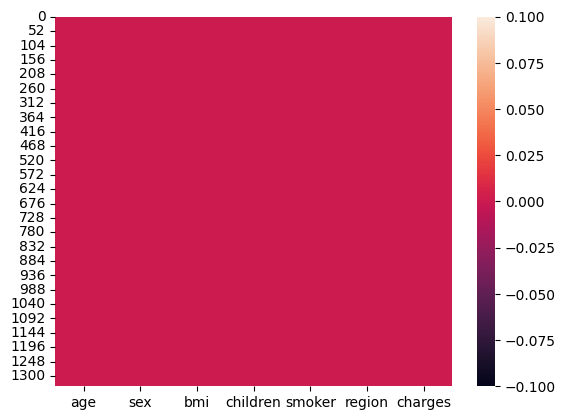

In [12]:
#Let's visualize this in heatmap
sns.heatmap(med_df.isnull())

In [13]:
#To get a good overview of the dataset
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


This gives the brief about the dataset which includes indexing type, column type, no null values and memory usage.

In [14]:
med_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [15]:
med_df['region'].nunique()

4

In [17]:
med_df.shape[0]

1338

In [16]:
#Checking the value counts of each column
for i in med_df.columns:
    print(med_df[i].value_counts())
    print('\n')

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64


sex
male      676
female    662
Name: count, dtype: int64


bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


smoker
no     1064
yes     274
Name: count, dtype: int64


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


charges
1639.56310     2
16884.92400    1
29

<Axes: >

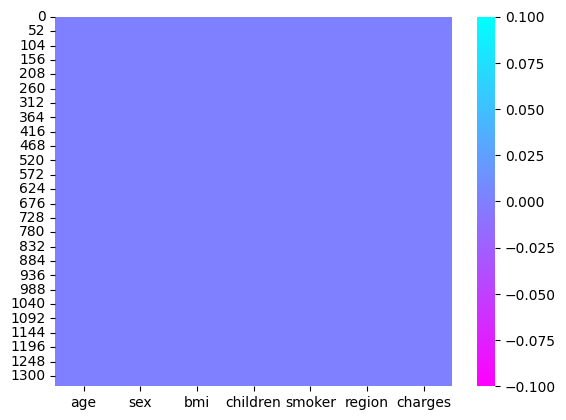

In [18]:
#Lets check the NaN values again
sns.heatmap(med_df.isnull(), cmap = 'cool_r')

In [19]:
#Seperating Numerical and Categorical columns

#Checking for Categorical columns
categorical_col = []
for i in med_df.dtypes.index:
    if med_df.dtypes[i] == "object":
        categorical_col.append(i)
print("Categorical Cloumns: ", categorical_col)
print("\n")

#Checking for Numerical columns
numerical_col = []
for i in med_df.dtypes.index:
    if med_df.dtypes[i] != "object":
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)

Categorical Cloumns:  ['sex', 'smoker', 'region']


Numerical Columns:  ['age', 'bmi', 'children', 'charges']


In [20]:
#checking number of unique values in each column
med_df.nunique().to_frame("No. of unique values")

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [21]:
#checking the list of counts of target
med_df["charges"].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [22]:
#Checking the unique values in the target column
med_df["charges"].value_counts()

charges
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

## Description of Dataset

In [23]:
#Statistical summary of numerical columns
med_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


This gives the statistical information of the numerical columns. The summary of the dataset looks perfect since there is no negative / 
invalid values present.

From the above description we can observe the following:

    1) The counts of all the columns are same, which means there are no missing values in the dataset.
    
    2) The mean value is greater than the median(50%) in charges column, which means the data is skewed to right in these columns.
    
    3) The data in the columns age, bmi, children have mean values almost same as median, which means the data is less skewed.
    
    4) By summarizing the data we can observe there is a huge difference between 75% and max hence there are outliers present in the data.
    
    5) We can also notice the Standard deviation, min, 25% percentile values from the describe method.

## Data Visualization

### Univariate Analysis

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


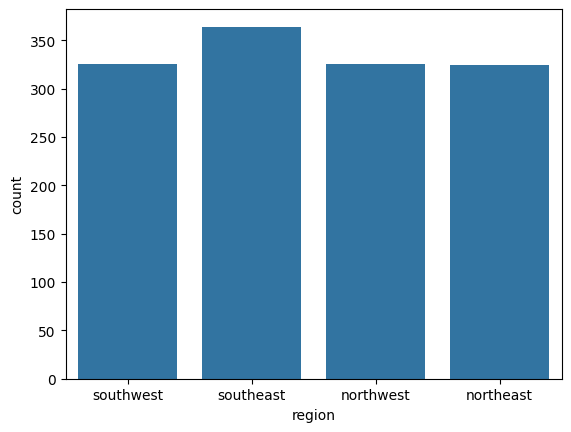

In [25]:
#Visualizing the count of region
print(med_df['region'].value_counts())
ax = sns.countplot(x='region', data=med_df)
plt.show()

smoker
no     1064
yes     274
Name: count, dtype: int64


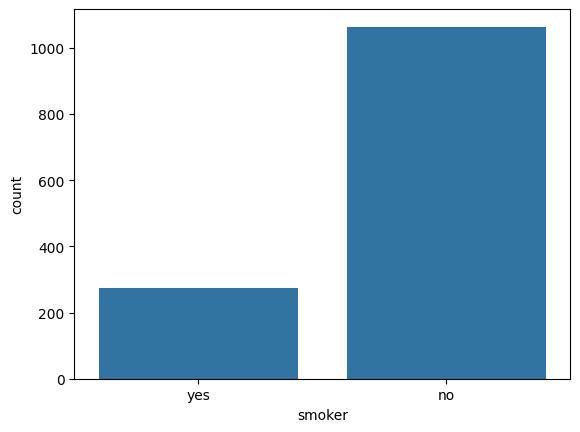

In [26]:
#Visualizing the count of smoker
print(med_df['smoker'].value_counts())
ax = sns.countplot(x='smoker', data=med_df)
plt.show()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


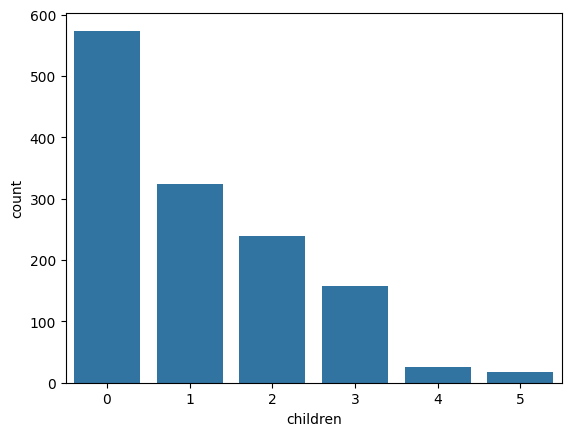

In [27]:
#Visualizing the count of children
print(med_df['children'].value_counts())
ax = sns.countplot(x='children', data=med_df)
plt.show()

sex
male      676
female    662
Name: count, dtype: int64


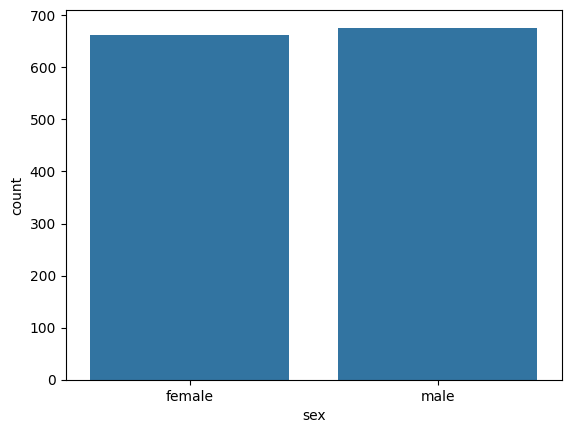

In [29]:
#Visualizing the count of sex
print(med_df['sex'].value_counts())
ax = sns.countplot(x='sex', data=med_df)
plt.show()

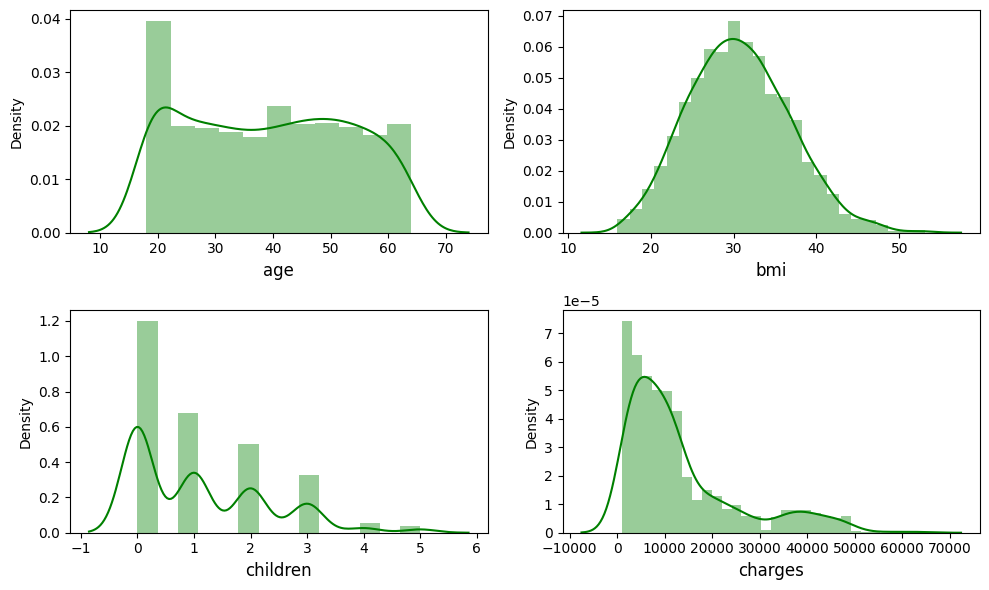

In [32]:
#Let's check how the data has been distributed in the numerical columns
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.distplot(med_df[col], color = 'g')
        plt.xlabel(col, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber += 1
plt.tight_layout()

### BiVariate Analysis

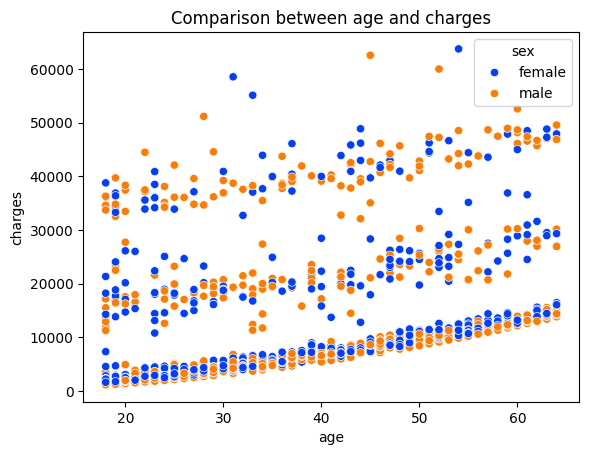

In [35]:
#Comparing age and charges on the basis of sex
plt.title("Comparison between age and charges")
sns.scatterplot(x='age', y='charges', data=med_df, hue='sex', palette='bright')
plt.show()

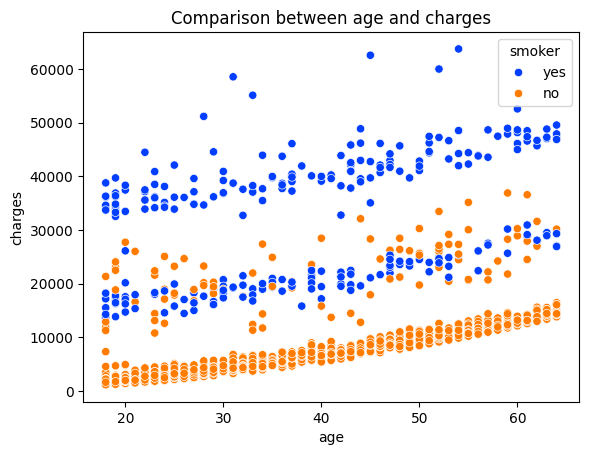

In [36]:
#Comparing age and charges on the basis of smoker
plt.title("Comparison between age and charges")
sns.scatterplot(x='age', y='charges', data=med_df, hue='smoker', palette='bright')
plt.show()

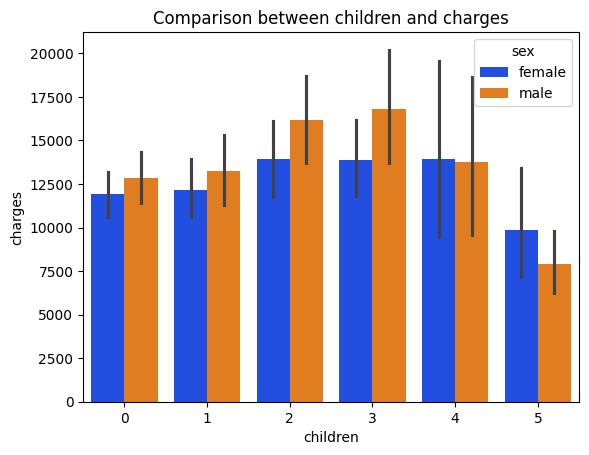

In [38]:
#Comparing children and charges on the basis of sex
plt.title("Comparison between children and charges")
sns.barplot(x='children', y='charges', data=med_df, hue='sex', palette='bright')
plt.show()

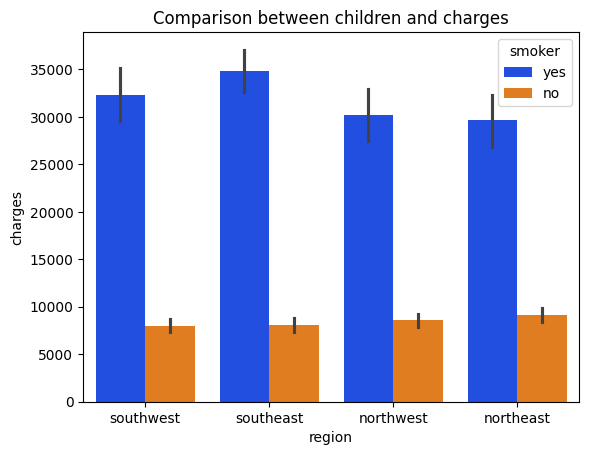

In [39]:
#Comparing region and charges on the basis of smoker
plt.title("Comparison between children and charges")
sns.barplot(x='region', y='charges', data=med_df, hue='smoker', palette='bright')
plt.show()

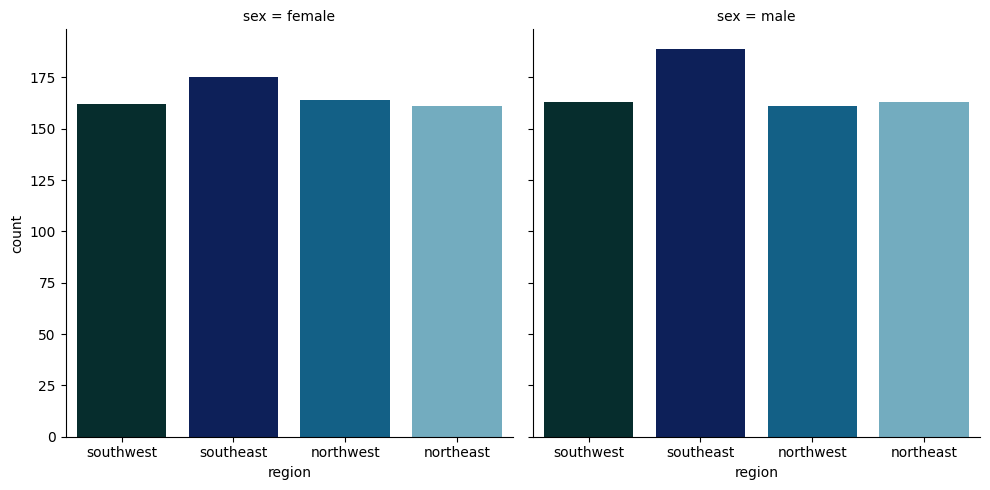

In [45]:
#Checking sex in region
sns.catplot(x='region', col='sex', data=med_df, kind='count', palette='ocean')

plt.show()

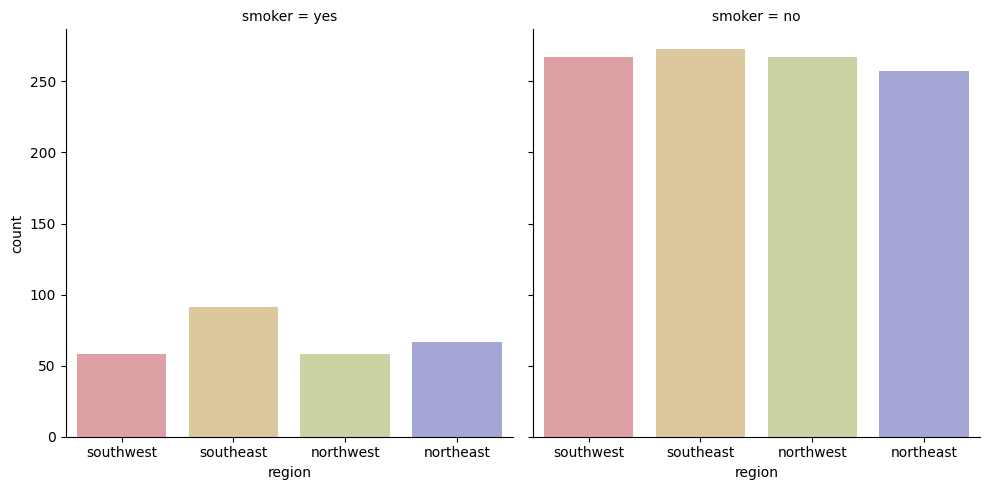

In [46]:
#Checking smoker in region
sns.catplot(x='region', col='smoker', data=med_df, kind='count', palette='tab20b_r')

plt.show()

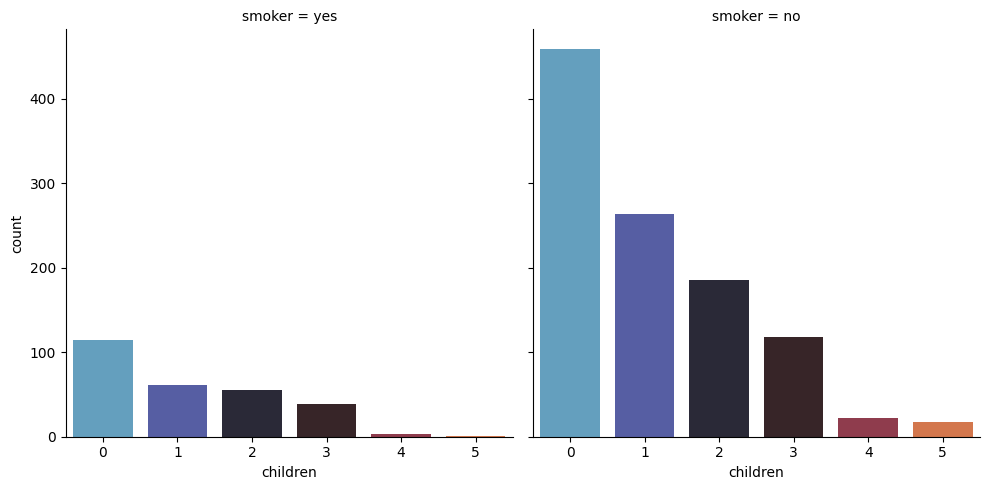

In [47]:
#Checking smoker and having children
sns.catplot(x='children', col='smoker', data=med_df, kind='count', palette='icefire')

plt.show()

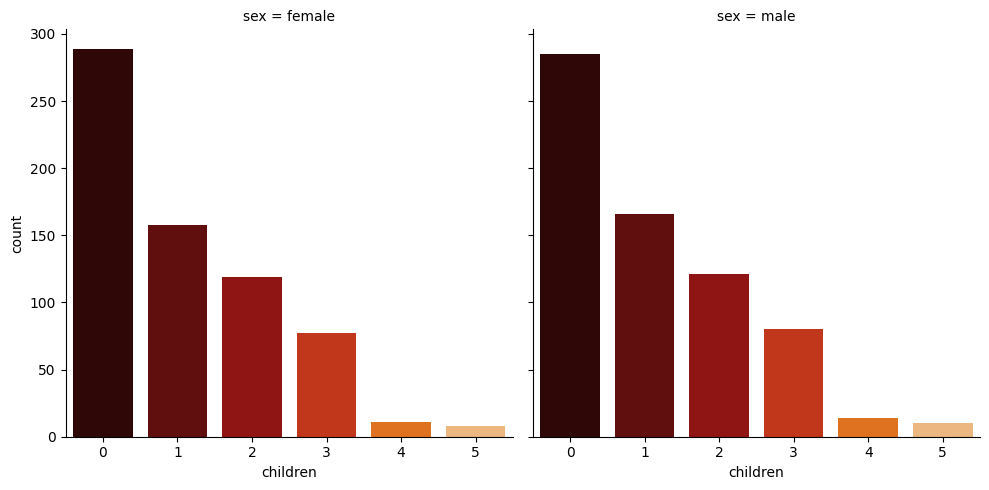

In [49]:
#Checking smoker and having children
sns.catplot(x='children', col='sex', data=med_df, kind='count', palette='gist_heat')

plt.show()

### MultiVariate Analysis

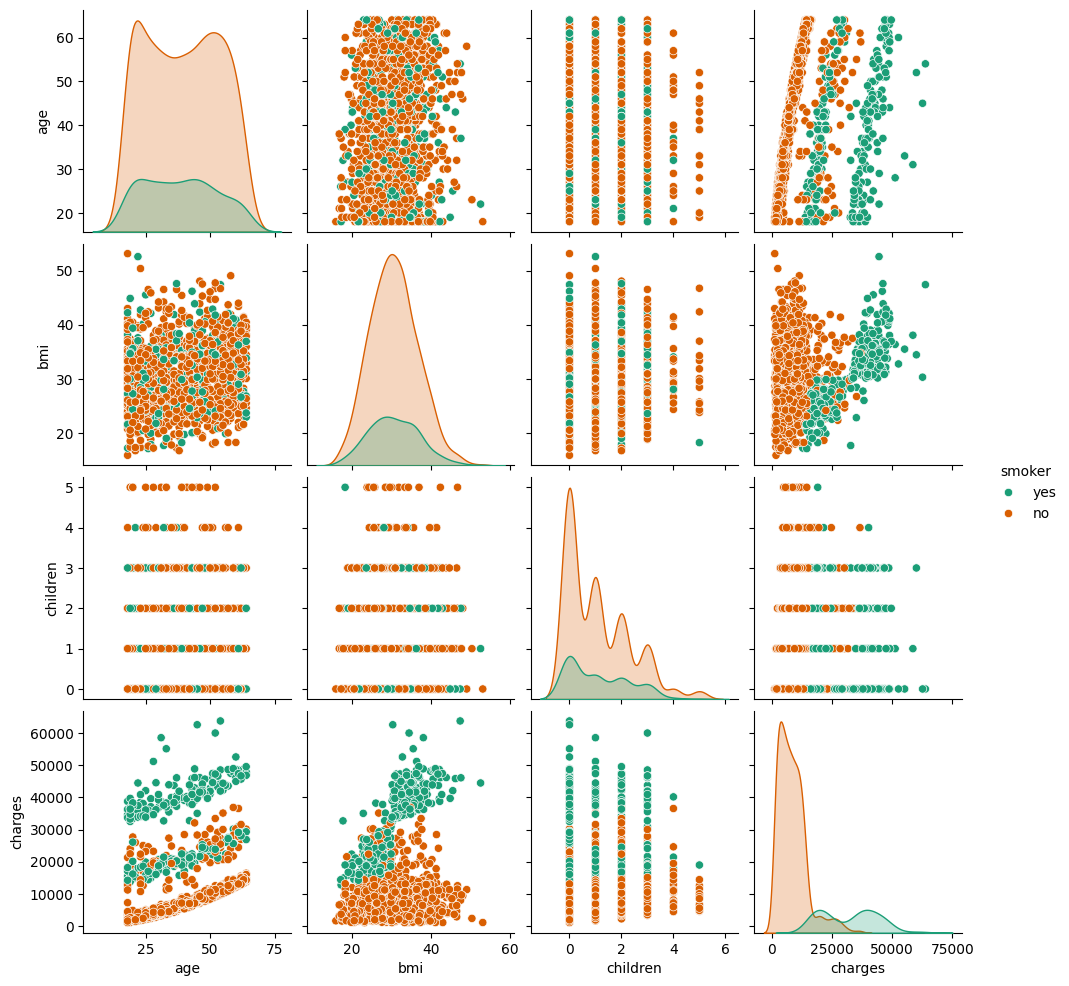

In [51]:
sns.pairplot(med_df, hue='smoker', palette='Dark2')
plt.show()

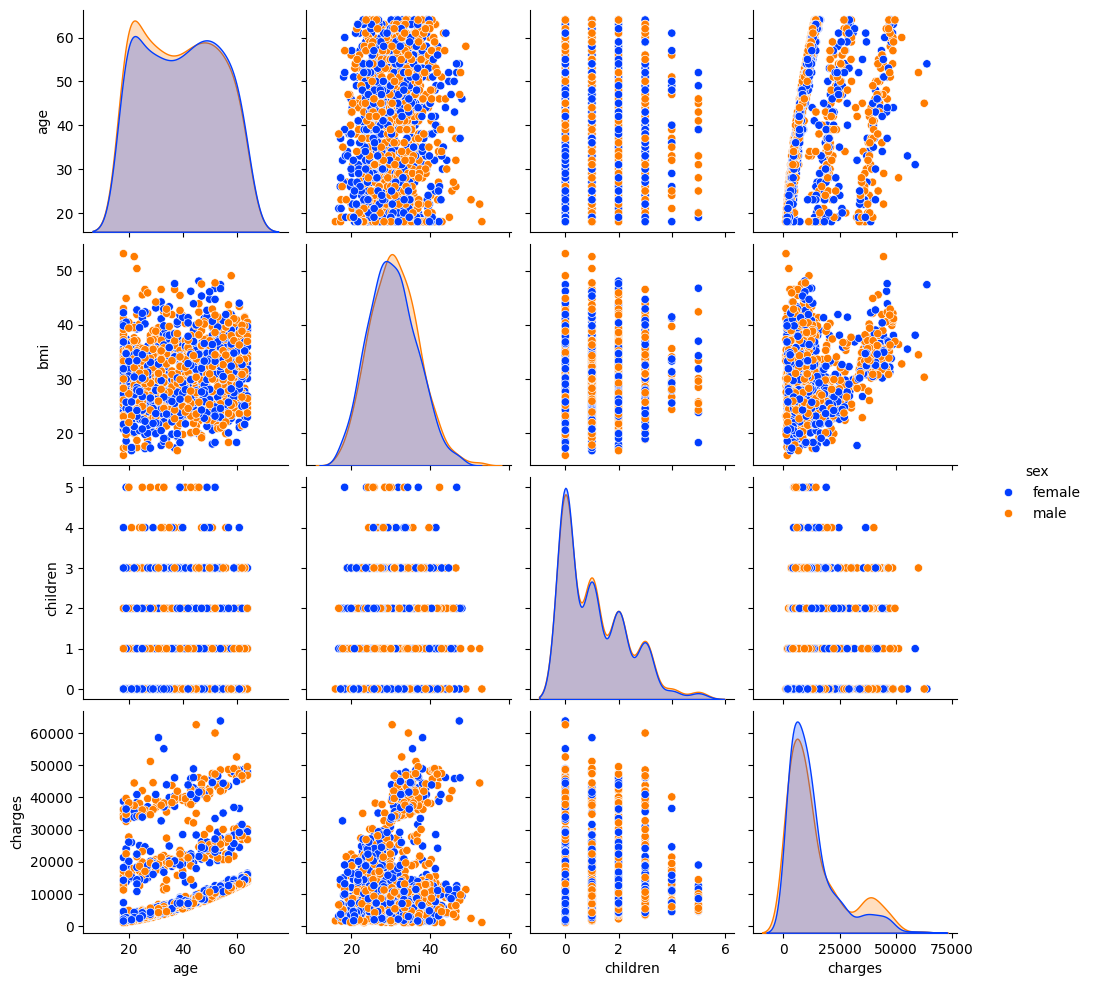

In [54]:
sns.pairplot(med_df, hue='sex', palette='bright')
plt.show()

### Checking for Outliers

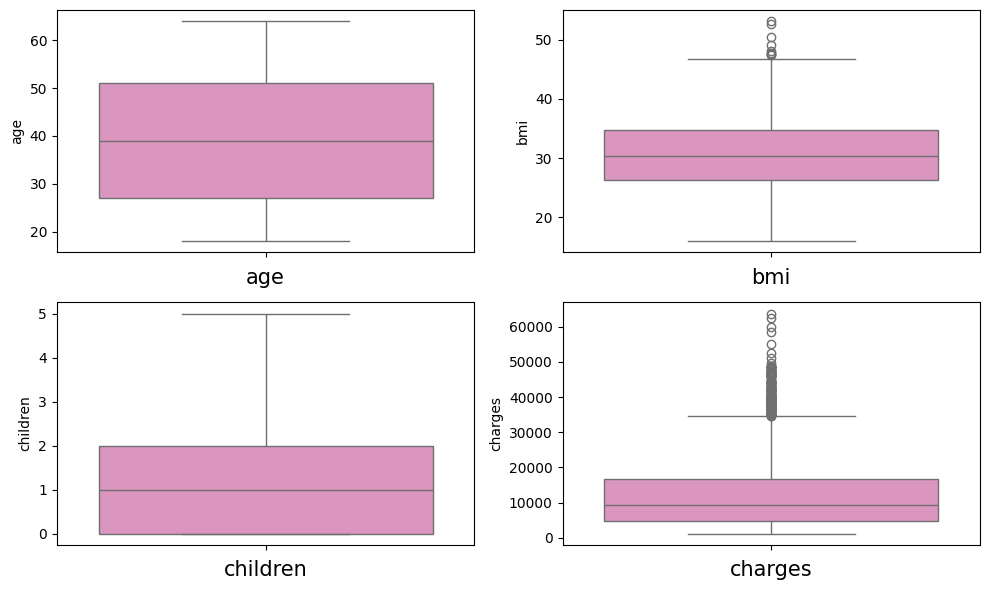

In [55]:
#Let's check the outliers by plotting boxplot
plt.figure(figsize=(10,6), facecolor='white')
plotnumber = 1
for col in numerical_col:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.boxplot(med_df[col], palette='Set2_r')
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber += 1
plt.tight_layout()

### Checking for Skewness

In [56]:
#Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in med_df.columns:
    if med_df[i].dtypes == 'object':
        med_df[i] = OE.fit_transform(med_df[i].values.reshape(-1,1))
med_df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [57]:
med_df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

In [59]:
#Removing skewness using cuberoot method
med_df['charges'] = np.cbrt(med_df['charges'])

In [60]:
#Checking skewness again
med_df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     0.515183
dtype: float64

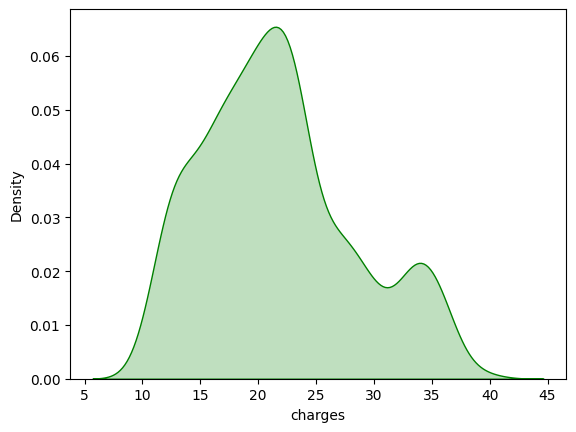

In [61]:
#Let's visualize how the data has been distributed in charges after removing skewness
sns.distplot(med_df['charges'], color='g', kde_kws={'shade':True}, hist=False)
plt.show()

### Encoding Categorical columns

In [62]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   float64
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   float64
 5   region    1338 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.3 KB


In [64]:
#Statistical summary of numerical
med_df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,21.740315
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,6.609017
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,10.390777
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,16.798411
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,21.091088
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,25.529963
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,39.952115


### Correlation between the Target Variable and Independent Variables

In [65]:
#Checking the correlation between the features and the target.
cor = med_df.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.451354
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.027560
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.156375
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.123941
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.732564
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.029807
charges,0.451354,0.027560,0.156375,0.123941,0.732564,-0.029807,1.000000


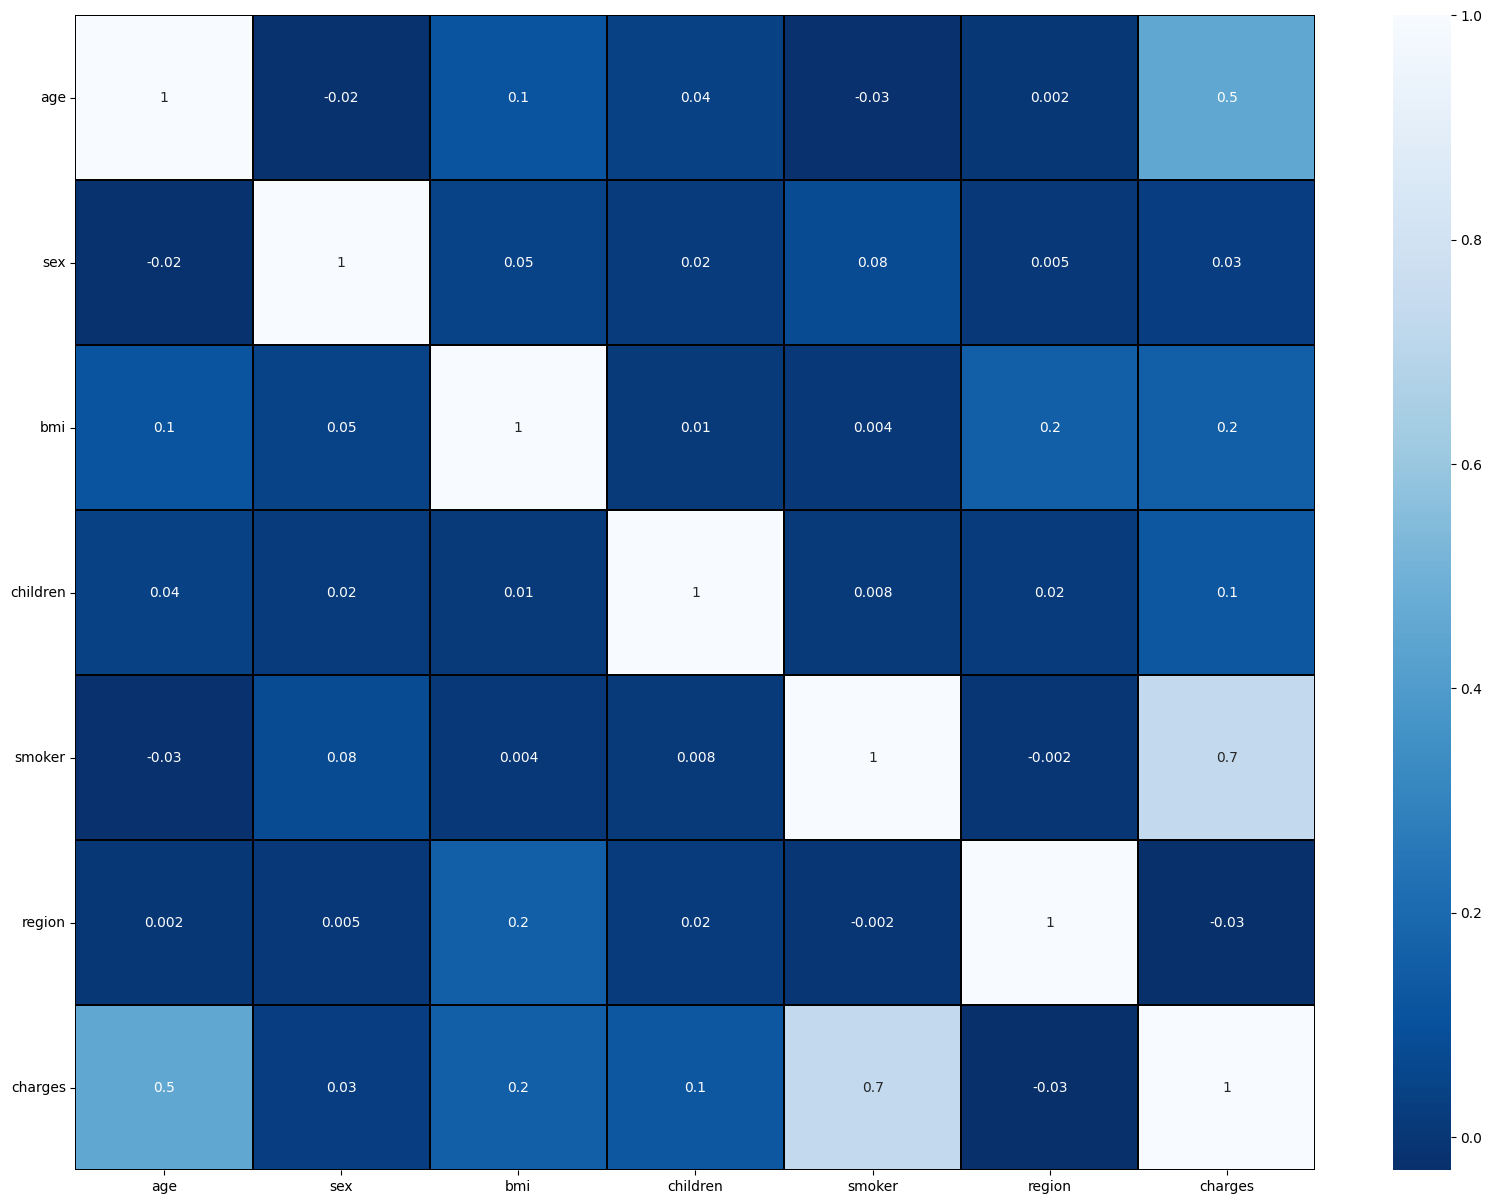

In [66]:
#Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(med_df.corr(), linewidths=0.1, fmt=".1g", linecolor='black', annot=True, cmap='Blues_r')
plt.yticks(rotation=0)
plt.show()

In [67]:
cor['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.732564
age         0.451354
bmi         0.156375
children    0.123941
sex         0.027560
region     -0.029807
Name: charges, dtype: float64

### Visualizing the correlation between label and features using bar plot

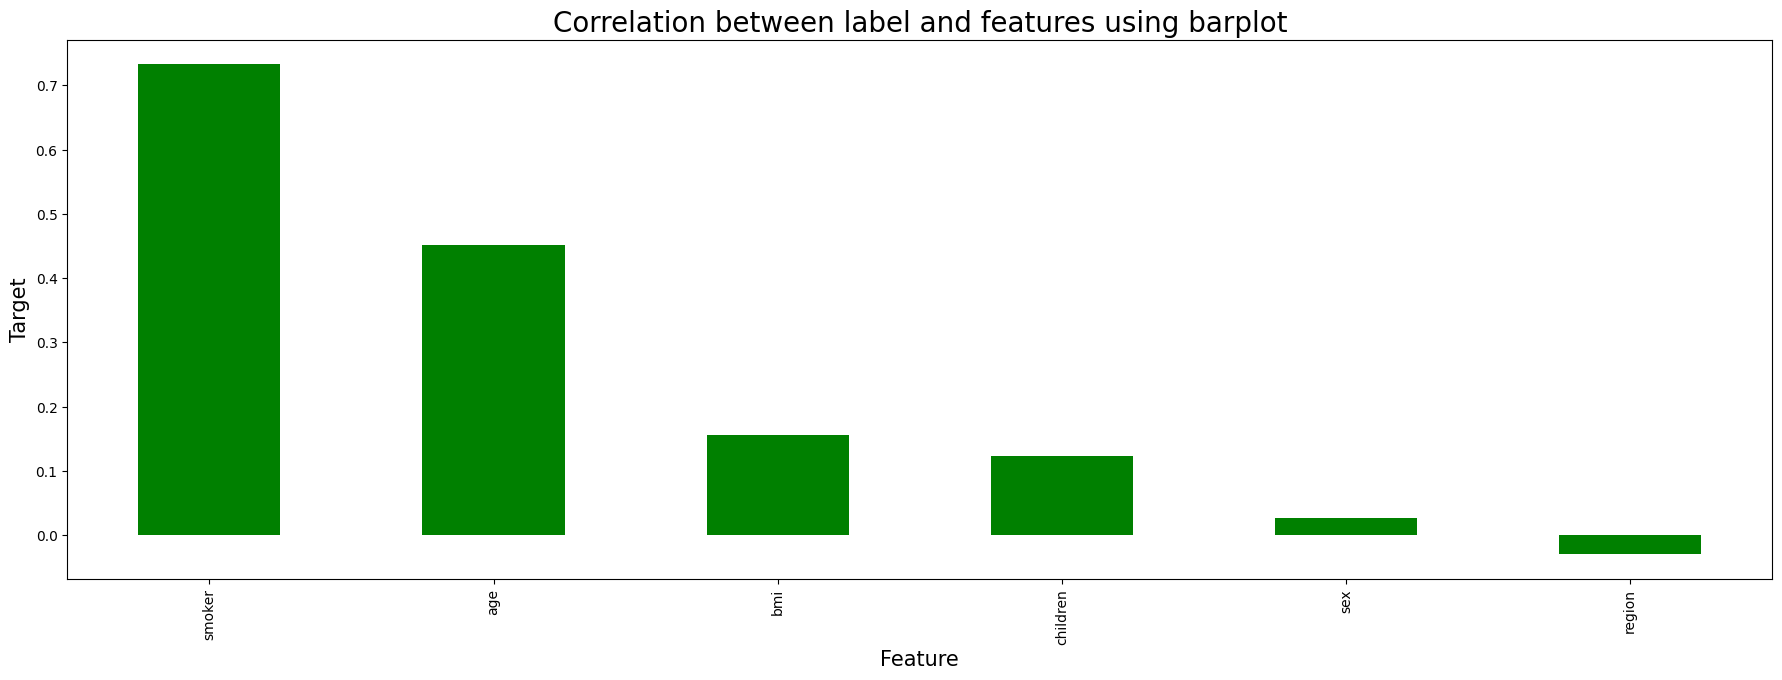

In [72]:
plt.figure(figsize=(22,7))
med_df.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar', color='g')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title("Correlation between label and features using barplot", fontsize=20)
plt.show()

### Seperating Features and Label(target)

In [74]:
x = med_df.drop('charges', axis=1)
y = med_df['charges']

#### Feature Scaling using Standard Scalarization

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.466915
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-1.372326
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,0.438495
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,1.343905


### Checking Variance Inflation Factor (VIF)

In [76]:
#Finding variance inflation factor in each scaled column i.e., x.shape[1] (1/1-R2)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.015394,age
1,1.008889,sex
2,1.040608,bmi
3,1.002482,children
4,1.006466,smoker
5,1.025966,region


In [78]:
y.value_counts()

charges
11.791690    2
25.654666    1
30.839610    1
13.048271    1
27.052506    1
            ..
19.438627    1
29.666427    1
30.469610    1
10.475061    1
30.773007    1
Name: count, Length: 1337, dtype: int64

### Oversampling

In [79]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

ValueError: Unknown label type: 'continuous'